# Tamas Flesch Thesis - Decision Tree step

## LMJU - UpGrad - DS

### Fifa 23 Ultimate Team player price prediction based on the player's attributes

Table of contents
- Imports
- Read data
- Inspect the data
- Build decision tree model
- Using a random forest
- Grid Search experiment

#### Imports

In [2]:
# Importing the required libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

#### Read data

In [4]:
# Reading the csv file and putting it into 'df' object.
df = pd.read_csv('futbin.csv')

#### Inspecting the data

In [5]:
df.head()

,Name,Rating,Price,Skills_Star,Weak_Foot_Star,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defense / Speed,...,Alt_Pos_3_CF,Alt_Pos_3_CM,Alt_Pos_3_LB,Alt_Pos_3_LM,Alt_Pos_3_LW,Alt_Pos_3_LWB,Alt_Pos_3_RM,Alt_Pos_3_RW,Alt_Pos_3_ST,Alt_Pos_3_missing
0,Pelé,98,3270000.0,5,4,95.0,96,93,96,60,...,0,0,0,0,0,0,0,0,0,1
1,Lionel Messi,98,4350000.0,4,4,93.0,98,97,99,40,...,0,0,0,0,0,0,0,0,0,1
2,Lionel Messi,98,4640000.0,4,4,94.0,97,96,99,40,...,0,0,0,0,0,0,0,0,0,1
3,Karim Benzema,97,1850000.0,4,5,92.0,97,90,94,45,...,0,0,0,0,0,0,0,0,0,1
4,Kylian Mbappé,97,9750000.0,5,4,99.0,96,88,98,44,...,0,0,0,0,0,0,0,0,0,1


In [32]:
df_names = df.pop('Name')

In [33]:
df.head()

,Rating,Price,Skills_Star,Weak_Foot_Star,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defense / Speed,Physical / Positioning,...,Alt_Pos_3_CF,Alt_Pos_3_CM,Alt_Pos_3_LB,Alt_Pos_3_LM,Alt_Pos_3_LW,Alt_Pos_3_LWB,Alt_Pos_3_RM,Alt_Pos_3_RW,Alt_Pos_3_ST,Alt_Pos_3_missing
0,98,3270000.0,5,4,95.0,96,93,96,60,76,...,0,0,0,0,0,0,0,0,0,1
1,98,4350000.0,4,4,93.0,98,97,99,40,77,...,0,0,0,0,0,0,0,0,0,1
2,98,4640000.0,4,4,94.0,97,96,99,40,79,...,0,0,0,0,0,0,0,0,0,1
3,97,1850000.0,4,5,92.0,97,90,94,45,90,...,0,0,0,0,0,0,0,0,0,1
4,97,9750000.0,5,4,99.0,96,88,98,44,87,...,0,0,0,0,0,0,0,0,0,1


In [34]:
df_names.head()

0             Pelé
1     Lionel Messi
2     Lionel Messi
3    Karim Benzema
4    Kylian Mbappé
Name: Name, dtype: object

#### Build a decision tree model

In [20]:
from sklearn.tree import DecisionTreeRegressor

In [21]:
dt = DecisionTreeRegressor(random_state=42, max_depth=4, min_samples_leaf=10)

In [35]:
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size=0.8, random_state=100)

In [36]:
df_train.shape, df_test.shape

((5117, 104), (1280, 104))

In [37]:
df_test.head()

,Rating,Price,Skills_Star,Weak_Foot_Star,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defense / Speed,Physical / Positioning,...,Alt_Pos_3_CF,Alt_Pos_3_CM,Alt_Pos_3_LB,Alt_Pos_3_LM,Alt_Pos_3_LW,Alt_Pos_3_LWB,Alt_Pos_3_RM,Alt_Pos_3_RW,Alt_Pos_3_ST,Alt_Pos_3_missing
2691,69,250.0,3,3,60.0,69,51,62,28,69,...,0,0,0,0,0,0,0,0,0,1
3785,66,200.0,3,3,73.0,65,49,66,22,60,...,0,0,0,0,0,0,0,0,0,1
4989,62,200.0,0,3,64.0,61,61,64,40,61,...,0,0,0,0,0,0,0,0,0,1
1222,75,450.0,3,3,53.0,53,74,79,61,58,...,0,0,0,0,0,0,0,0,0,1
3640,66,200.0,2,3,65.0,61,58,64,65,67,...,0,0,0,0,0,0,0,0,0,1


In [38]:
scaler = MinMaxScaler()

In [39]:
df_train['Price'] = scaler.fit_transform(df_train[['Price']])
df_test['Price'] = scaler.transform(df_test[['Price']])

In [40]:
df_train.Price.describe()

count    5117.000000
mean        0.001729
std         0.022844
min         0.000000
25%         0.000000
50%         0.000010
75%         0.000053
max         1.000000
Name: Price, dtype: float64

In [41]:
y_train = df_train.pop("Price")
X_train = df_train

y_test = df_test.pop("Price")
X_test = df_test

In [42]:
X_test.shape, X_train.shape

((1280, 103), (5117, 103))

#### Fit the DT model

In [43]:
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=10, random_state=42)

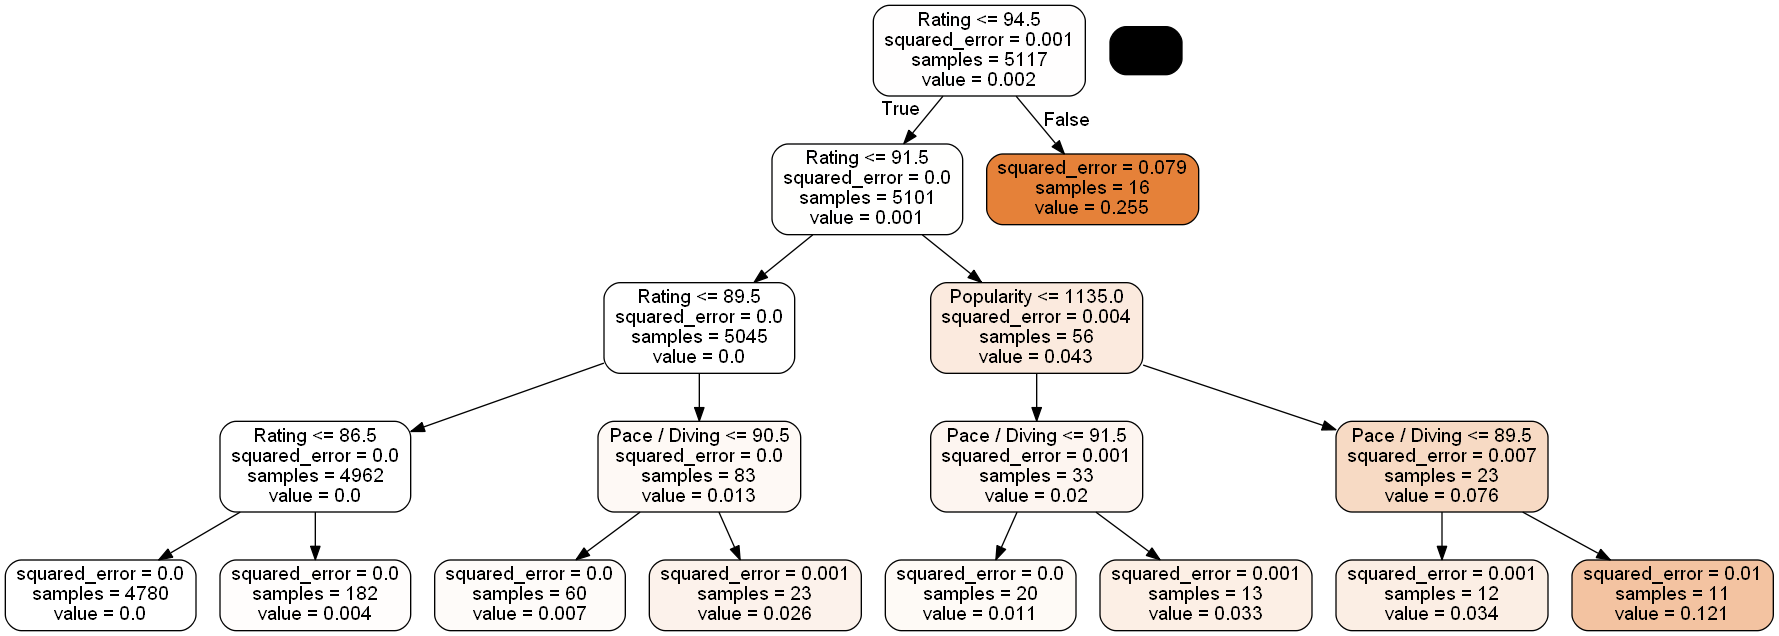

In [44]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

dot_data = StringIO()

export_graphviz(dt, out_file=dot_data, filled=True, rounded=True,
                feature_names=X_train.columns)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [45]:
y_train_pred = dt.predict(X_train)

In [47]:
from sklearn.metrics import r2_score

In [48]:
r2_score(y_train, y_train_pred)

0.46511633392209173

In [49]:
y_test_pred = dt.predict(X_test)

In [50]:
r2_score(y_test, y_test_pred)

0.41381406125743336

#### Using Random Forest Regressor

In [51]:
from sklearn.ensemble import RandomForestRegressor

In [52]:
rf = RandomForestRegressor(random_state=42, n_jobs=-1, max_depth=5, min_samples_leaf=10)

In [53]:
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, min_samples_leaf=10, n_jobs=-1,
                      random_state=42)

In [54]:
sample_tree = rf.estimators_[20]

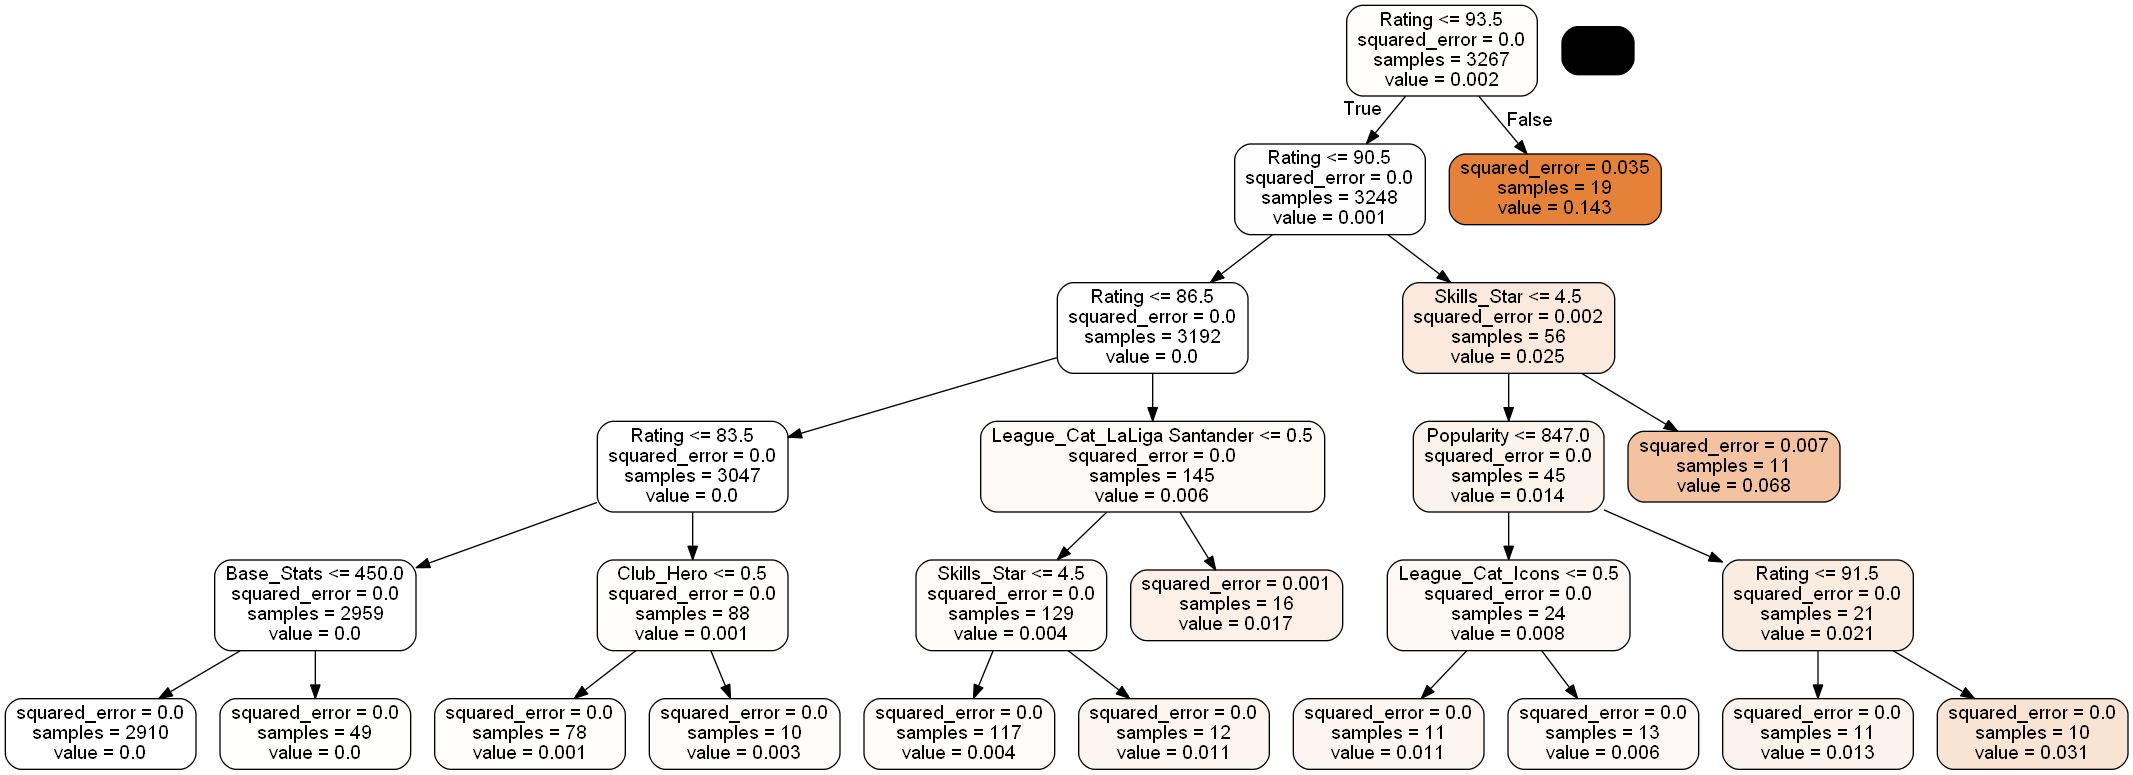

In [55]:
dot_data = StringIO()
export_graphviz(sample_tree, out_file=dot_data, filled=True, rounded=True,
                feature_names=X_train.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [56]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

In [57]:
r2_score(y_train, y_train_pred)

0.4665518871340596

In [58]:
r2_score(y_test, y_test_pred)

0.6085673962637769

In [59]:
rf.feature_importances_

array([8.63107840e-01, 4.11047310e-03, 0.00000000e+00, 2.35199905e-02,
       1.84573743e-04, 7.48589702e-03, 7.71977045e-02, 3.47173992e-04,
       4.02122200e-04, 1.96892230e-02, 3.62010511e-04, 9.44533176e-04,
       4.62558964e-06, 4.77114424e-04, 8.55871299e-04, 5.08042821e-05,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 4.59991441e-07, 3.69134191e-04, 5.66323717e-04,
       0.00000000e+00, 0.00000000e+00, 3.23781650e-07, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.36985890e-05, 2.04145436e-04, 2.39002353e-07,
      

In [60]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf.feature_importances_})

In [61]:
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
0,Rating,0.863108
6,Dribbling / Reflexes,0.077198
3,Pace / Diving,0.023520
9,Popularity,0.019689
5,Passing / Kicking,0.007486
...,...,...
43,BodyType_Text_Messi,0.000000
42,BodyType_Text_Lean,0.000000
41,BodyType_Text_High & Stocky,0.000000
40,BodyType_Text_High & Lean,0.000000


#### Grid search for hyper-parameter tuning

In [62]:
#from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [63]:
classifier_rf = RandomForestRegressor(random_state=42, n_jobs=-1)

In [64]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [5, 8, 10, 13, 15, 17, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'max_features': [2,3,4],
    'n_estimators': [10, 30, 50, 100, 200]
}

In [85]:
# Instantiate the grid search model
# cv=4 -> 4-fold cross validation schema
grid_search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=params, 
                          cv=10, n_jobs=-1, verbose=1, scoring = "r2", error_score="raise")

In [70]:
X_train.head()

,Rating,Skills_Star,Weak_Foot_Star,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defense / Speed,Physical / Positioning,Popularity,...,Alt_Pos_3_CF,Alt_Pos_3_CM,Alt_Pos_3_LB,Alt_Pos_3_LM,Alt_Pos_3_LW,Alt_Pos_3_LWB,Alt_Pos_3_RM,Alt_Pos_3_RW,Alt_Pos_3_ST,Alt_Pos_3_missing
2556,69,2,3,68.0,64,65,68,66,71,0,...,0,0,0,0,0,0,0,0,0,1
5208,61,2,3,37.0,27,39,39,58,71,1,...,0,0,0,0,0,0,0,0,0,1
2567,69,2,2,68.0,37,63,66,67,68,6,...,0,0,0,0,0,0,0,0,0,1
3412,67,3,4,77.0,66,56,67,29,56,0,...,0,0,0,0,0,0,0,0,0,1
2673,69,2,3,73.0,67,65,70,36,55,5,...,0,0,0,0,0,0,0,0,0,1


In [71]:
y_train.head()

2556    0.000043
5208    0.000653
2567    0.000113
3412    0.000027
2673    0.000017
Name: Price, dtype: float64

In [81]:
X_train.shape

(5117, 103)

In [82]:
y_train.shape

(5117,)

In [86]:
%%time
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 525 candidates, totalling 5250 fits
CPU times: total: 25.4 s
Wall time: 7min 48s


GridSearchCV(cv=10, error_score='raise',
             estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [5, 8, 10, 13, 15, 17, 20],
                         'max_features': [2, 3, 4],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 30, 50, 100, 200]},
             scoring='r2', verbose=1)

In [87]:
rf_best = grid_search.best_estimator_

In [88]:
rf_best

RandomForestRegressor(max_depth=10, max_features=4, min_samples_leaf=5,
                      n_estimators=200, n_jobs=-1, random_state=42)

In [89]:
y_train_pred = rf_best.predict(X_train)
y_test_pred = rf_best.predict(X_test)

In [90]:
r2_score(y_train, y_train_pred)

0.42985622276084756

In [91]:
r2_score(y_test, y_test_pred)

0.43889540025568174

In [92]:
rf_best.feature_importances_

array([1.27692642e-01, 4.83770707e-02, 1.59748454e-02, 7.20043965e-02,
       1.25897401e-01, 6.42622827e-02, 1.44817704e-01, 2.91795004e-02,
       2.34158031e-02, 5.72564589e-02, 6.34699221e-02, 6.74117801e-02,
       1.84441807e-02, 9.71723894e-03, 1.29137152e-02, 3.04718328e-03,
       1.73705341e-04, 2.03632739e-04, 8.11418527e-04, 1.51815146e-03,
       5.67718424e-05, 4.88507780e-05, 1.98656505e-05, 3.95510989e-03,
       5.93939023e-06, 3.87282426e-04, 1.68129795e-04, 6.87949271e-05,
       3.80398324e-06, 4.95817141e-03, 2.84880037e-03, 1.50803630e-03,
       3.05452165e-05, 2.59960910e-03, 8.65948284e-03, 2.93119221e-03,
       0.00000000e+00, 0.00000000e+00, 5.23205658e-04, 1.32026536e-04,
       0.00000000e+00, 6.17288287e-05, 7.75539661e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.88387919e-06, 6.88842143e-05, 5.63710998e-07, 2.78378520e-05,
       6.65866942e-03, 2.54568151e-02, 4.19120803e-04, 5.38554725e-03,
      

In [93]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_})

In [95]:
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
6,Dribbling / Reflexes,0.144818
0,Rating,0.127693
4,Shooting / Handling,0.125897
3,Pace / Diving,0.072004
11,Ingame_Stats,0.067412
...,...,...
87,Alt_Pos_2_RB,0.000000
99,Alt_Pos_3_RM,0.000000
37,BodyType_Text_Courtois,0.000000
36,BodyType_Text_CR7,0.000000


###### second grid search

- max depth testing around 10
- max feature around 4
- sample leaf around 5
- estimator around 200

In [176]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [8, 9, 10, 11, 12, 13],
    'min_samples_leaf': [2,3,4,5,6,7,8],
    'max_features': [4,6,8,10],
    'n_estimators': [100, 150, 200, 250, 300]
}

In [177]:
# Instantiate the grid search model
# cv=4 -> 4-fold cross validation schema
grid_search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=params, 
                          cv=10, n_jobs=-1, verbose=1, scoring = "r2", error_score="raise")

In [98]:
%%time
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 840 candidates, totalling 8400 fits
CPU times: total: 39.3 s
Wall time: 41min 22s


GridSearchCV(cv=10, error_score='raise',
             estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [8, 9, 10, 11, 12, 13],
                         'max_features': [4, 6, 8, 10],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8],
                         'n_estimators': [100, 150, 200, 250, 300]},
             scoring='r2', verbose=1)

In [99]:
rf_best = grid_search.best_estimator_

In [100]:
rf_best

RandomForestRegressor(max_depth=8, max_features=8, min_samples_leaf=2,
                      n_jobs=-1, random_state=42)

In [102]:
y_train_pred = rf_best.predict(X_train)
y_test_pred = rf_best.predict(X_test)

In [103]:
r2_score(y_train, y_train_pred)

0.7268290034088154

In [104]:
r2_score(y_test, y_test_pred)

0.6122313567377293

In [105]:
rf_best.feature_importances_

array([1.38489015e-01, 4.66858447e-02, 1.51138366e-02, 8.28239884e-02,
       1.08141260e-01, 5.74164927e-02, 1.26643262e-01, 3.73862489e-02,
       2.83327822e-02, 4.88247605e-02, 5.54882980e-02, 4.12670687e-02,
       1.53507463e-02, 1.37700267e-02, 1.60956680e-02, 2.00895569e-03,
       1.26215167e-04, 6.95812904e-06, 1.30401345e-03, 1.33142932e-03,
       9.07435426e-05, 1.82934812e-04, 6.30403671e-05, 1.51820461e-02,
       1.25060262e-06, 4.52118325e-05, 2.80795915e-04, 1.16865943e-04,
       2.21889599e-07, 9.76897426e-03, 2.31602367e-03, 1.17541680e-04,
       1.33593246e-05, 2.19611689e-03, 1.77063715e-02, 4.95317456e-03,
       0.00000000e+00, 0.00000000e+00, 2.81857258e-04, 2.38660430e-05,
       2.92761059e-07, 7.57767917e-09, 7.08016776e-04, 5.55441104e-03,
       0.00000000e+00, 2.16383224e-02, 0.00000000e+00, 0.00000000e+00,
       2.83678825e-06, 1.11221718e-05, 1.28650138e-07, 3.47949213e-06,
       7.19721972e-03, 1.79522994e-02, 1.61142358e-04, 6.74598724e-03,
      

In [106]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_})

In [107]:
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
0,Rating,0.138489
6,Dribbling / Reflexes,0.126643
4,Shooting / Handling,0.108141
3,Pace / Diving,0.082824
5,Passing / Kicking,0.057416
...,...,...
80,Alt_Pos_2_CDM,0.000000
95,Alt_Pos_3_LB,0.000000
44,BodyType_Text_R9,0.000000
46,BodyType_Text_Salah,0.000000


##### third grid search

In [108]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [8, 9, 10],
    'min_samples_leaf': [1,2,3],
    'max_features': [7,8,9,10],
    'n_estimators': [100, 150, 200, 250, 300]
}

In [110]:
# Instantiate the grid search model
# cv=4 -> 4-fold cross validation schema
grid_search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=params, 
                          cv=10, n_jobs=-1, verbose=2, scoring = "r2", error_score="raise")

In [111]:
%%time
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits
CPU times: total: 8.41 s
Wall time: 8min 35s


GridSearchCV(cv=10, error_score='raise', estimator=RandomForestRegressor(),
             n_jobs=-1,
             param_grid={'max_depth': [8, 9, 10], 'max_features': [7, 8, 9, 10],
                         'min_samples_leaf': [1, 2, 3],
                         'n_estimators': [100, 150, 200, 250, 300]},
             scoring='r2', verbose=2)

In [112]:
rf_best = grid_search.best_estimator_

In [113]:
rf_best

RandomForestRegressor(max_depth=9, max_features=10, min_samples_leaf=2)

In [114]:
y_train_pred = rf_best.predict(X_train)
y_test_pred = rf_best.predict(X_test)

In [115]:
r2_score(y_train, y_train_pred)

0.755998374506422

In [116]:
r2_score(y_test, y_test_pred)

0.6320821355740586

##### forth gridsearch

In [117]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [8, 9, 10],
    'min_samples_leaf': [1,2,3],
    'max_features': [10,20,30,40],
    'n_estimators': [100,200,300]
}

In [119]:
grid_search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=params, 
                          cv=10, n_jobs=-1, verbose=2, scoring = "r2", error_score="raise")

In [120]:
%%time
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits
CPU times: total: 6.23 s
Wall time: 9min 41s


GridSearchCV(cv=10, error_score='raise', estimator=RandomForestRegressor(),
             n_jobs=-1,
             param_grid={'max_depth': [8, 9, 10],
                         'max_features': [10, 20, 30, 40],
                         'min_samples_leaf': [1, 2, 3],
                         'n_estimators': [100, 200, 300]},
             scoring='r2', verbose=2)

In [121]:
rf_best = grid_search.best_estimator_

In [122]:
rf_best

RandomForestRegressor(max_depth=10, max_features=10, min_samples_leaf=2,
                      n_estimators=200)

In [123]:
y_train_pred = rf_best.predict(X_train)
y_test_pred = rf_best.predict(X_test)

In [124]:
r2_score(y_train, y_train_pred)

0.7601409765037306

In [125]:
r2_score(y_test, y_test_pred)

0.5793143634800904

##### fifth gridsearch

In [126]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [8,9,10,11],
    'min_samples_leaf': [1,2,3],
    'max_features': [9,10,11,12],
    'n_estimators': [150,200,250]
}

In [127]:
grid_search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=params, 
                          cv=10, n_jobs=-1, verbose=2, scoring = "r2", error_score="raise")

In [128]:
%%time
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits
CPU times: total: 6.61 s
Wall time: 7min 52s


GridSearchCV(cv=10, error_score='raise', estimator=RandomForestRegressor(),
             n_jobs=-1,
             param_grid={'max_depth': [8, 9, 10, 11],
                         'max_features': [9, 10, 11, 12],
                         'min_samples_leaf': [1, 2, 3],
                         'n_estimators': [150, 200, 250]},
             scoring='r2', verbose=2)

In [129]:
rf_best = grid_search.best_estimator_

In [130]:
rf_best

RandomForestRegressor(max_depth=9, max_features=10, n_estimators=200)

In [131]:
y_train_pred = rf_best.predict(X_train)
y_test_pred = rf_best.predict(X_test)

In [132]:
r2_score(y_train, y_train_pred)

0.9204138340558483

In [133]:
r2_score(y_test, y_test_pred)

0.6727454133535952

#### Final model after grid search

In [166]:
rf = RandomForestRegressor(random_state=42, n_jobs=-1, max_depth=9, n_estimators=200, max_features=20)

In [167]:
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=9, max_features=20, n_estimators=200, n_jobs=-1,
                      random_state=42)

In [168]:
sample_tree = rf.estimators_[2]

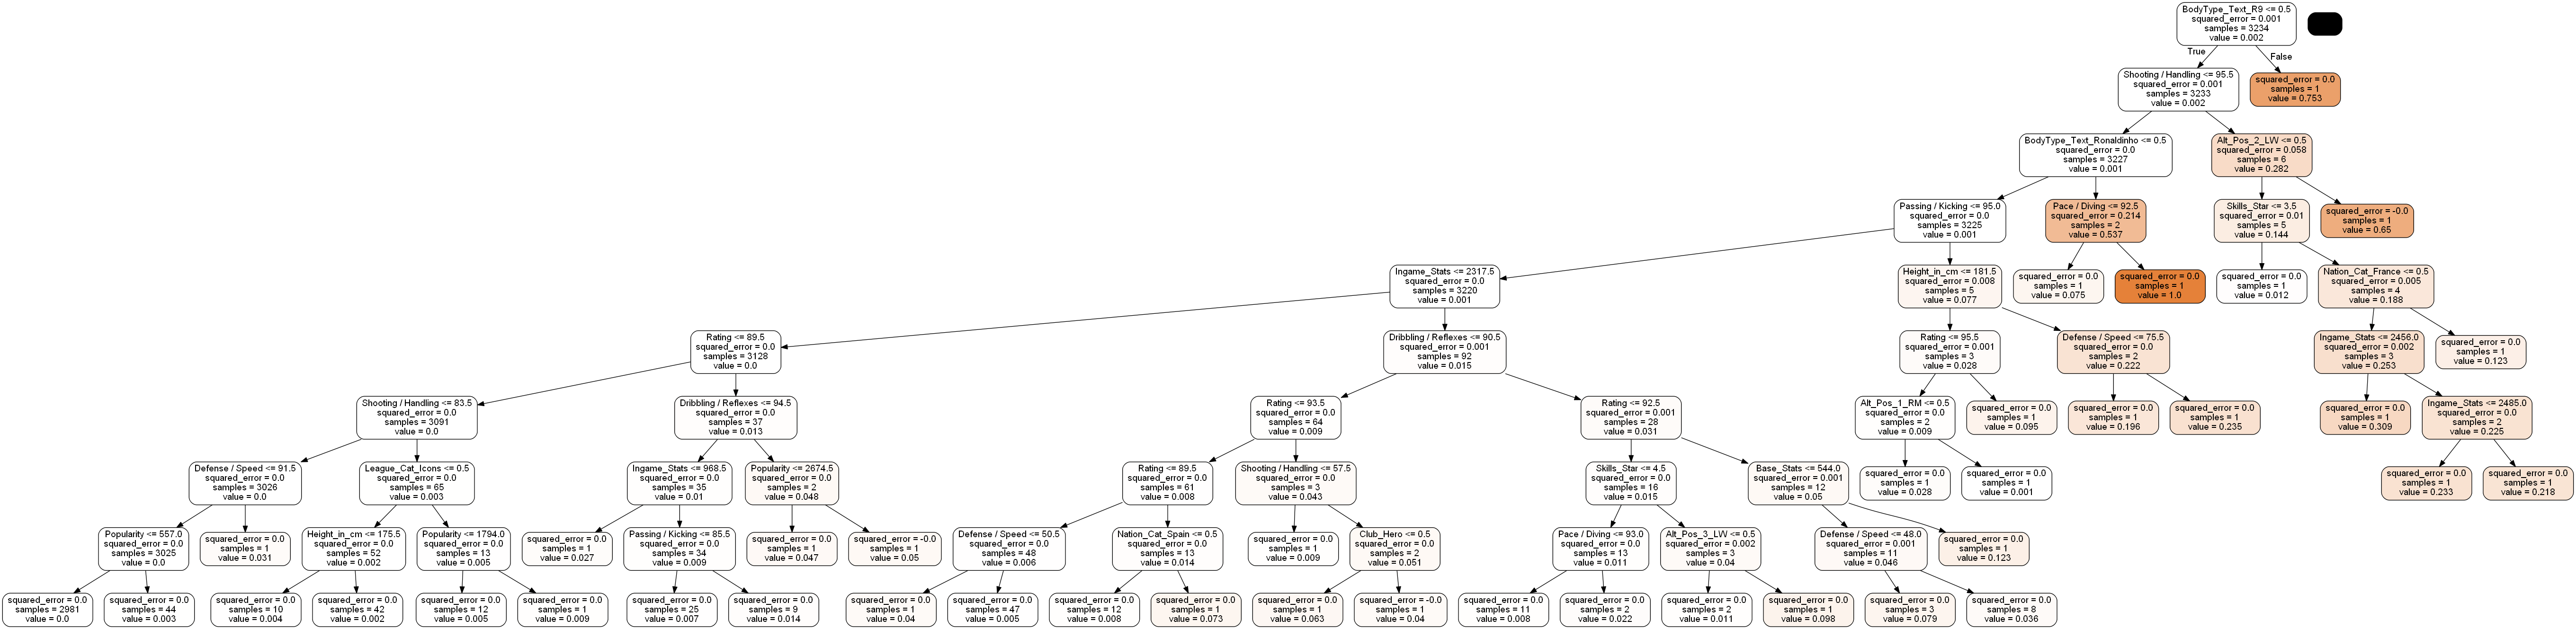

In [169]:
dot_data = StringIO()
export_graphviz(sample_tree, out_file=dot_data, filled=True, rounded=True,
                feature_names=X_train.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [170]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

In [171]:
r2_score(y_train, y_train_pred)

0.9111099629582339

In [172]:
r2_score(y_test, y_test_pred)

0.6946316867354081

In [173]:
rf.feature_importances_

array([1.54227577e-01, 3.38025014e-02, 6.13521060e-03, 8.57044644e-02,
       9.32105450e-02, 3.49512604e-02, 1.28418526e-01, 3.77531647e-02,
       1.37835014e-02, 4.18185863e-02, 4.12193749e-02, 3.46733427e-02,
       1.68488482e-02, 1.44599500e-02, 8.03670500e-03, 1.09859057e-02,
       1.10481212e-04, 9.16481082e-07, 3.02904448e-03, 7.34819817e-04,
       8.84070374e-05, 2.85144951e-04, 1.36549923e-06, 1.26327298e-02,
       1.53830061e-05, 1.41996130e-04, 9.62478940e-04, 1.93141729e-05,
       3.23521504e-06, 3.55383930e-03, 4.86880557e-03, 7.02825543e-04,
       1.25400345e-04, 2.12460059e-03, 8.77149995e-03, 3.19316754e-03,
       5.27790193e-08, 0.00000000e+00, 1.48310230e-03, 1.81494113e-04,
       6.16499733e-06, 2.43354677e-07, 7.88097204e-04, 7.13182824e-03,
       3.55364412e-02, 7.36057306e-02, 1.13237740e-05, 0.00000000e+00,
       5.86782212e-06, 2.68740766e-04, 5.62214915e-10, 3.32833972e-05,
       6.32531925e-03, 9.40655932e-03, 7.35020932e-04, 6.00569782e-03,
      

In [174]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_})

In [175]:
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
6,Dribbling / Reflexes,1.332667e-01
0,Rating,1.013360e-01
4,Shooting / Handling,9.981897e-02
3,Pace / Diving,6.632334e-02
45,BodyType_Text_Ronaldinho,6.168733e-02
...,...,...
47,BodyType_Text_Shaqiri,1.665979e-10
99,Alt_Pos_3_RM,1.368178e-13
94,Alt_Pos_3_CM,0.000000e+00
95,Alt_Pos_3_LB,0.000000e+00
